# Clustering with Sklearn

In this notebook we'll practice clustering algorithms with Scikit-Learn.

## Data sets

We'll use the following datasets:
* Some sample data
* [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)
* [Old Faithful eruption data](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat): eruption times and wait times between eruptions

There are many [clustering data sets](https://archive.ics.uci.edu/ml/datasets.html?format=&task=clu&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) you can use for practice!


In [5]:
from collections import Counter
import random
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

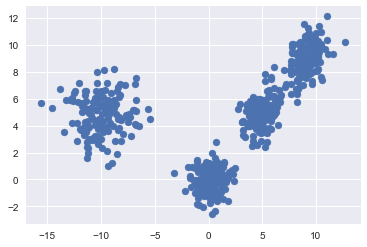

In [6]:
## Create some synthetic data

from scipy.stats import multivariate_normal
data = []
dist = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[5,5], cov=[[1,0.5],[0.2,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[9,9], cov=[[1,0.5],[0.2,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[-10,5], cov=[[3,0.5],[0.2,2]])
for i in range(150):
    data.append(dist.rvs())    
    
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])
plt.show()

In [7]:
def annulus(inner_radius, outer_radius, n=30, color='b'):
    """Generate n points with class `color` between the inner radius and the outer radius."""
    data = []
    diff = outer_radius - inner_radius
    for _ in range(n):
        # Pick an angle and radius
        angle = 2 * np.pi * random.random()
        r = inner_radius + diff * random.random()
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        data.append((x, y))
    # Return a data frame for convenience
    xs, ys = zip(*data)
    df = pd.DataFrame()
    df["x"] = xs
    df["y"] = ys
    df["color"] = color
    return df

df1 = annulus(2, 6, 200, color='r')
df2 = annulus(8, 10, 300, color='b')
df_circ = pd.concat([df1, df2])

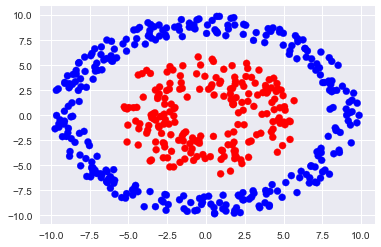

In [8]:
plt.scatter(df_circ['x'], df_circ['y'], c=df_circ['color'])
plt.show()

## K-Means with sklearn

In [9]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

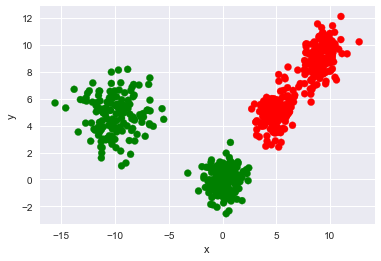

In [10]:
# Plot the data

def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try it with `k=4` this time.

Counter({3: 152, 1: 150, 2: 150, 0: 148})


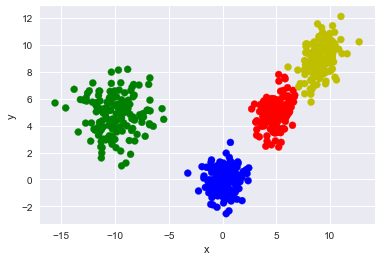

In [11]:
estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Let's try the circular data.

Counter({0: 257, 1: 243})


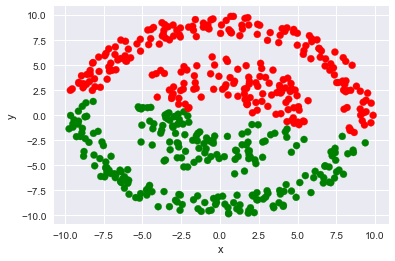

In [12]:
estimator = KMeans(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Ouch! No so great on this dataset. Now let's try some real data.

In [13]:
of_df = pd.read_csv("../../../dataset/old-faithful.csv")
of_df.head()

,eruption_time,wait_time
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


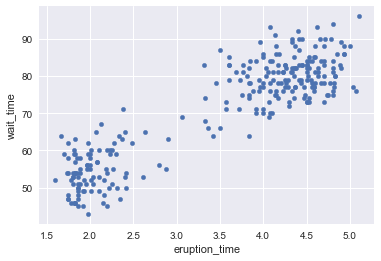

In [14]:
of_df.plot.scatter(x="eruption_time", y="wait_time")
plt.show()

In [15]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = of_df[["eruption_time", "wait_time"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)

Counter({0: 172, 1: 100})

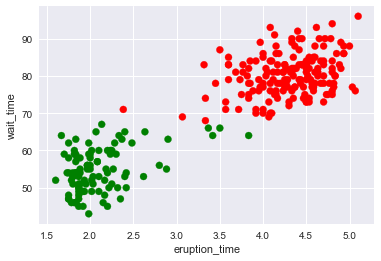

In [16]:
# Plot the data
colors = set_colors(labels)
plt.scatter(of_df["eruption_time"], of_df["wait_time"], c=colors)
plt.xlabel("eruption_time")
plt.ylabel("wait_time")
plt.show()

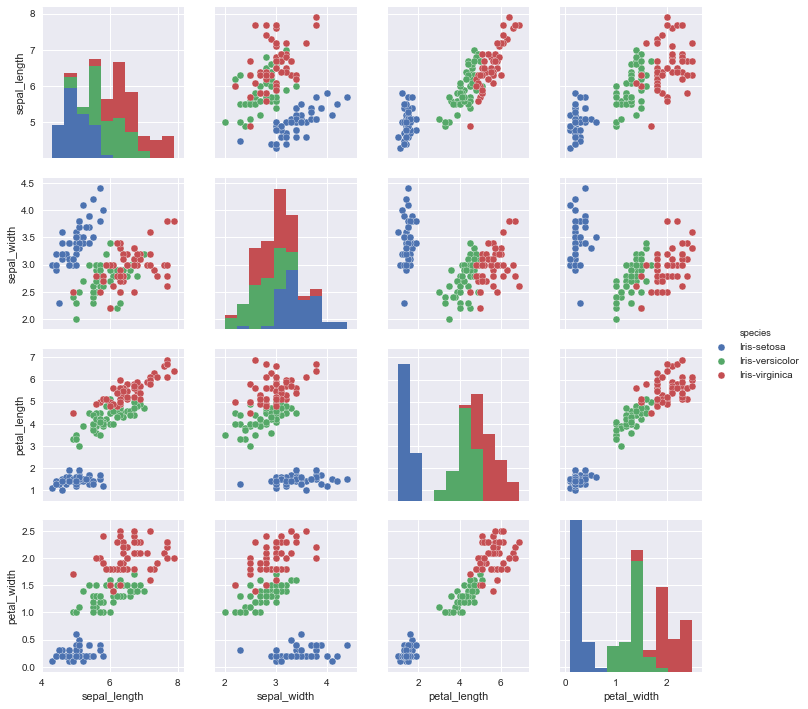

In [18]:
iris = pd.read_csv("../../../dataset/iris.data")
sns.pairplot(iris, hue="species")
plt.show()

## Exercise: k-means

For the Iris dataset, fit and plot k-means models to:
* sepal_length and petal_length, for k=2 and k=3
* sepal_width and petal_width, for k=2 and k=3

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

After: Check out the 3D-example [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

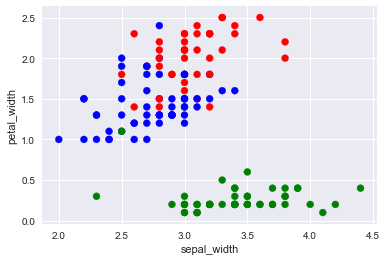

In [27]:
## Exercise Answers here

# Fit a k-means estimator
estimator = KMeans(n_clusters=3)
X = iris[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)

# Plot the data
colors = set_colors(labels)
plt.scatter(iris["sepal_width"], iris["petal_width"], c=colors)
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.show()

## DBSCAN

Counter({1: 297, 0: 149, 2: 127, -1: 27})


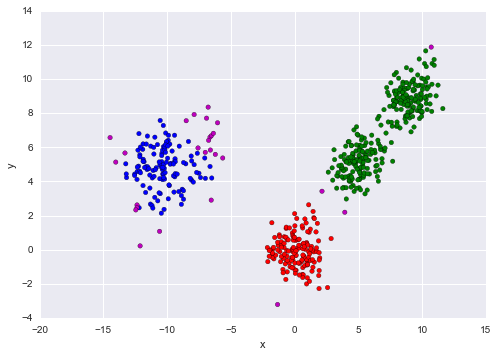

In [80]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 146, 0: 144, 2: 141, 3: 91, -1: 78})


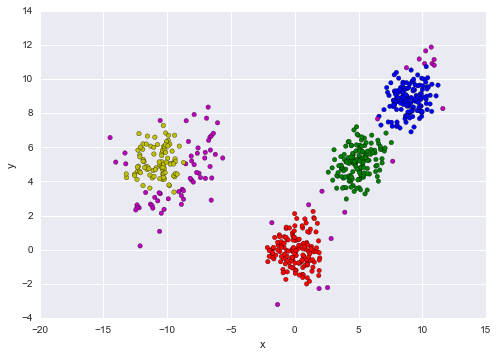

In [16]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 300, 0: 200})


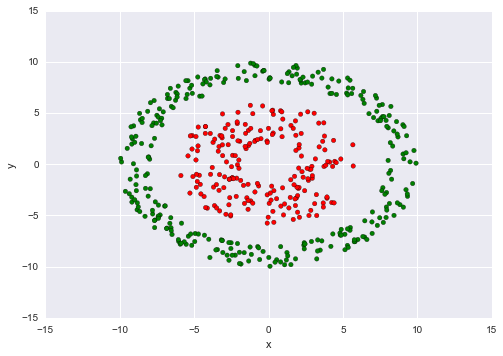

In [17]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Much better than k-means on this dataset! Let's try to cook up something that DBSCAN doesn't work as well on.

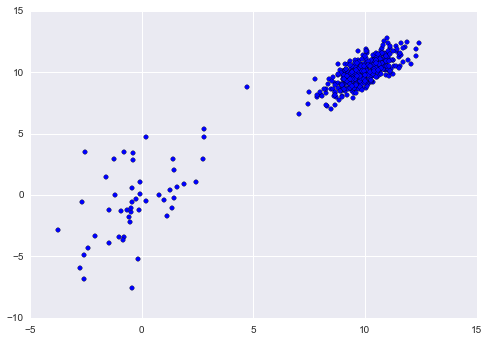

In [18]:
## Create some synthetic data

data = []
dist = multivariate_normal(mean=[0,0], cov=[[6,12],[1,6]])
for i in range(50):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[10,10], cov=[[1,1.1],[0.2,0.6]])
for i in range(400):
    data.append(dist.rvs())    
    
df2 = pd.DataFrame(data, columns=["x", "y"])
df2.head()
plt.scatter(df2['x'], df2['y'])
plt.show()

Counter({0: 383, -1: 67})


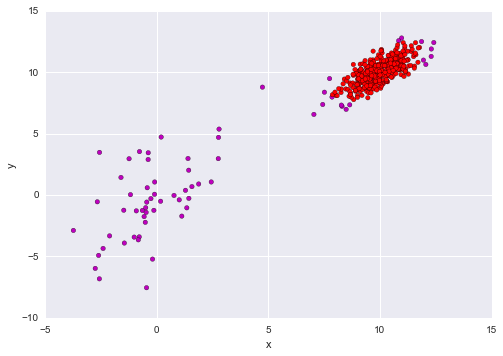

In [19]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.5, min_samples=10)
X = df2[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df2['x'], df2['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise: DBSCAN

For the Iris dataset, fit and plot dbscan models to:
* sepal_length and petal_length
* sepal_width and petal_width

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

In [86]:
## Exercise Answers here



## Hierarchical Clustering

Counter({3: 151, 0: 150, 2: 150, 1: 149})


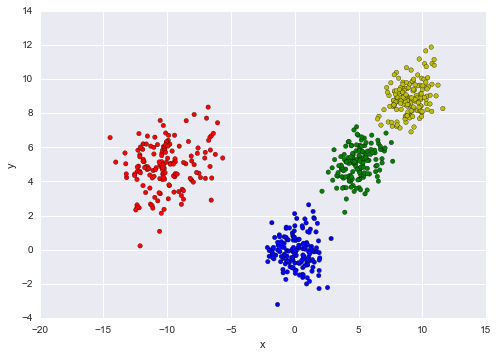

In [20]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 256, 0: 244})


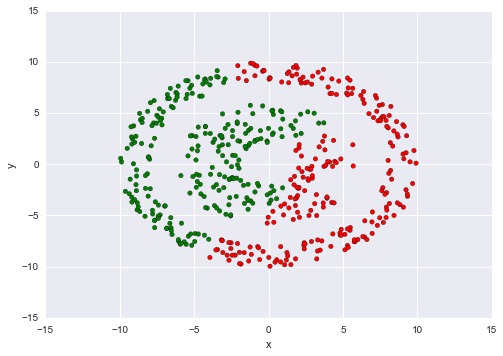

In [21]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [22]:
## Silhouette Coefficient

from sklearn import metrics

estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

print metrics.silhouette_score(X, labels, metric='euclidean')


Counter({3: 152, 0: 150, 2: 150, 1: 148})
0.707405920752


In [23]:
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)
print metrics.silhouette_score(X, labels, metric='euclidean')

Counter({1: 146, 0: 144, 2: 141, 3: 91, -1: 78})
0.553076248981


Bigger is better, so k-means was a better clustering algorithm on this data set.